# Correction TP Introduction -- François Portier

In [50]:
#Imports
%matplotlib notebook
import math                         # import a package
import numpy as np                  # import a package with specified name
from sklearn import linear_model    # import whole module
from os import mkdir, rmdir, path   # import a function
from inspect import getsourcelines  # get function source code
import random
import string
import time
import pandas as pd
import urllib
import zipfile
import matplotlib.pyplot as plt     # for plots
import seaborn as sns               # for plots
import sys

sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)

# 1) Introduction: Python, Numpy et Scipy

   ## Question 1: 
Écrire une fonction ```nextpower``` qui calcule la première puissance de 2 supérieure ou égale à un nombre $n$ (on veillera a ce que le type de sortie soit un <font color='red'>**int**</font>, tester cela avec <font color='red'>**type**</font> par exemple).

In [2]:
# Two possible solutions, non-exhaustive (but check at least on different values that they give the same results)
def nextpower(n):
    """Compute the next power of 2 of n."""
    return int(2 ** (math.ceil(math.log(n, 2))))


def nextpowerbis(n):
    """Compute the next power of 2 of n."""
    sol = 1
    while sol < n:
        sol *= 2
    return sol

In [3]:
print(nextpower(15))
print(nextpowerbis(15))
print(type(nextpower(15)))
print(type(nextpowerbis(15)))

t = time.time()
print(nextpower(10200000000))
print(time.time() - t)

t = time.time()
print(nextpowerbis(10200000000))
print(time.time() - t)


16
16
<class 'int'>
<class 'int'>
17179869184
5.698204040527344e-05
17179869184
5.793571472167969e-05


## Question 2:
En partant du mot contenant toutes les lettres de l'alphabet, générer par une opération de *slicing* la chaîne de caractère ```cfilorux``` et, de deux façons différentes, la chaîne de caractère ```vxz```.

In [4]:
alphabet = string.ascii_lowercase
print(alphabet[2:25:3])
print(alphabet[21:26:2])
print(alphabet[-5::2])


cfilorux
vxz
vxz


## Question 3:
Afficher le nombre $\pi$ avec 9 décimales après la virgule.

In [5]:
s = "Le nombre %s est égal à %.9f"
print(s % ("pi", math.pi))

Le nombre pi est égal à 3.141592654


## Question 4:
Compter le nombre d’occurrences de chaque caractère dans la chaîne de caractères ```s="HelLo WorLd!!" ```. On renverra un dictionnaire qui à chaque lettre associe son nombre d’occurrences.

In [6]:
s_new = "HelLo WorLd!!"
params = {}

for letter in s_new:
     #print(letter)
    if letter not in params:
        params[letter] = 1
    else:
        params[letter] += 1
        
print(params)

{'H': 1, 'e': 1, ' ': 1, 'r': 1, 'L': 2, 'l': 1, 'd': 1, 'W': 1, 'o': 2, '!': 2}


## Question 5:
Écrire une fonction de codage par inversion de lettres (aussi connu sous le nom de code de César): chaque lettre d'un mot est remplacée par une (et une seule) autre. On se servira de la fonction ```shuffle``` sur la chaîne de caractère contenant tout l'alphabet.

In [7]:
alphabet = string.ascii_letters
print(alphabet)
type(alphabet)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ


str

In [8]:
indexes = list(range(len(alphabet)))
random.shuffle(indexes)

print(indexes)
rosette_forward = {}
rosette_backward = {}
for i, letter in enumerate(alphabet):
    rosette_forward[letter] = alphabet[indexes[i]]
    rosette_backward[alphabet[indexes[i]]] = letter

rosette_forward[" "] = " "
rosette_backward[" "] = " "

print(rosette_forward)
print(rosette_backward)

[29, 25, 3, 7, 0, 8, 28, 39, 6, 15, 27, 45, 32, 14, 11, 49, 31, 47, 48, 17, 51, 41, 44, 34, 40, 23, 5, 1, 19, 36, 35, 9, 26, 50, 21, 16, 20, 10, 12, 30, 38, 13, 33, 18, 2, 46, 42, 22, 24, 37, 43, 4]
{'C': 't', 'i': 'g', 'X': 'L', 'T': 'U', 'w': 'S', 'y': 'O', 'F': 'j', 'A': 'f', 'h': 'N', ' ': ' ', 'M': 'm', 'z': 'x', 'L': 'k', 'Y': 'R', 't': 'r', 'm': 'G', 'k': 'B', 'U': 'Q', 'V': 'w', 'g': 'C', 'G': 'A', 'H': 'Y', 'Q': 'H', 'E': 'J', 'c': 'd', 'S': 'c', 'Z': 'e', 'l': 'T', 'K': 'u', 'q': 'F', 'W': 'y', 'I': 'v', 'a': 'D', 'P': 'n', 'e': 'a', 's': 'W', 'J': 'q', 'D': 'K', 'R': 's', 'o': 'l', 'x': 'I', 'B': 'b', 'u': 'Z', 'v': 'P', 'd': 'h', 'p': 'X', 'f': 'i', 'n': 'o', 'O': 'M', 'r': 'V', 'j': 'p', 'b': 'z', 'N': 'E'}
{'C': 'g', 'i': 'f', 'X': 'p', 'W': 's', 'w': 'V', 'y': 'W', 'g': 'i', 'F': 'q', 'A': 'G', 'h': 'd', ' ': ' ', 'M': 'O', 'z': 'b', 'v': 'I', 't': 'C', 'm': 'M', 'k': 'L', 'U': 'T', 'V': 'r', 'T': 'l', 'G': 'm', 'Y': 'H', 'Z': 'u', 'E': 'N', 'c': 'S', 'S': 'w', 'Q': 'U',

In [9]:
def coding(message, rosette, alphabet):
    """encodage"""
    message_coded = ""
    for i, letter in enumerate(message):
        if letter in alphabet:
            message_coded += rosette[letter]
        else:
            message_coded += letter
    message_coded = message_coded
    return message_coded


message = "Tu les crois malades? Ça gémit ça rote... ça titube..." \
    "ça pustule... Tu veux vider ta salle d'attente? Instantanément? " \
    "même de ceux qui s'en étranglent à se ramoner les glaviots ?..." \
    "Propose un coup de cinéma!... un apéro gratuit en face!... " \
    "tu vas voir combien qu'il t'en reste...S'ils viennent te relancer " \
    "c'est d'abord parce qu'ils s'emmerdent. " \
    "T'en vois pas un la veille des fêtes..."

# message = "Tu les crois malades ?".decode('utf8')
print("Message original:\n" + message + "\n")
message_encoded = coding(message, rosette_forward, alphabet)
print("Message codé:" + "\n"+ message_encoded + "\n")
message_decoded = coding(message_encoded, rosette_backward, alphabet)
print("Message décodé:" + "\n"+ message_decoded  + "\n")
print("Est ce que le message décodé est identique à l'original? " + str(message_decoded==message) )


Message original:
Tu les crois malades? Ça gémit ça rote... ça titube...ça pustule... Tu veux vider ta salle d'attente? Instantanément? même de ceux qui s'en étranglent à se ramoner les glaviots ?...Propose un coup de cinéma!... un apéro gratuit en face!... tu vas voir combien qu'il t'en reste...S'ils viennent te relancer c'est d'abord parce qu'ils s'emmerdent. T'en vois pas un la veille des fêtes...

Message codé:
UZ TaW dVlgW GDTDhaW? ÇD CéGgr çD Vlra... çD rgrZza...çD XZWrZTa... UZ PaZI PghaV rD WDTTa h'Drraora? voWrDorDoéGaor? GêGa ha daZI FZg W'ao érVDoCTaor à Wa VDGloaV TaW CTDPglrW ?...nVlXlWa Zo dlZX ha dgoéGD!... Zo DXéVl CVDrZgr ao iDda!... rZ PDW PlgV dlGzgao FZ'gT r'ao VaWra...c'gTW Pgaooaor ra VaTDodaV d'aWr h'DzlVh XDVda FZ'gTW W'aGGaVhaor. U'ao PlgW XDW Zo TD PagTTa haW iêraW...

Message décodé:
Tu les crois malades? Ça gémit ça rote... ça titube...ça pustule... Tu veux vider ta salle d'attente? Instantanément? même de ceux qui s'en étranglent à se ramoner les glaviots ?

PS: un peu de lecture sur l'utf8: http://sametmax.com/lencoding-en-python-une-bonne-fois-pour-toute/

## Question 6:
Calculer $ 2 \displaystyle\prod_{k=1}^{\infty}\frac{4 k^2}{4k^2-1}$ efficacement. On pourra utiliser ```time``` (ou ```%timeit``` pour déterminer la rapidité de votre méthode. Proposer une version sans boucle utilisant ```Numpy```.

In [10]:
def wallis1(n):
    """Wallis: naive version."""
    result = 2.
    for k in range(1, n + 1, 1):
        result *= 4. * k ** 2 / (4. * k ** 2. - 1.)
    return result

def wallis2(n):
    """Wallis: better version."""
    result = 2.
    for k in range(1, n + 1, 1):
        int = 4 * k ** 2
        result *= int / (int - 1.)
    return result


def wallis3(n):
    """Wallis: lame version."""
    if n == 1:
        return 8. / 3.
    else:
        sqrpart = 4 * n ** 2
        return (sqrpart / (sqrpart - 1.) * wallis3(n - 1))
print(wallis3(50))


memo = {1: 8. / 3.}


def wallis4(n):
    """Wallis: storage version."""
    sqrpart = 4 * n ** 2
    if n not in memo:
        memo[n] = wallis4(n - 1) * sqrpart / (sqrpart - 1)
    return memo[n]

t = time.time()
print(wallis4(50))
print(time.time() - t)


def wallis5(n):
    """Wallis: no loop version."""
    sol = np.arange(1, n + 1)
    sol = sol ** 2
    sol = 4. * sol / (4. * sol - 1.)
    return 2 * np.prod(sol)



3.126078900215411
3.1260789002154112
0.00017881393432617188


In [11]:
print("Wallis version 1")
t = time.time()
print(wallis1(500))
print(time.time() - t)

print("Wallis version 2")
t = time.time()
print(wallis2(500))
print(time.time() - t)

print("Wallis version 3")
t = time.time()
print(wallis3(500))
print(time.time() - t)

print("Wallis version 4")
t = time.time()
print(wallis4(500))
print(time.time() - t)

print("Wallis version 5")
t = time.time()
print(wallis5(500))
print(time.time() - t)

Wallis version 1
3.1400238186006004
0.0003809928894042969
Wallis version 2
3.1400238186006004
0.00033092498779296875
Wallis version 3
3.1400238186006004
0.0006330013275146484
Wallis version 4
3.140023818600592
0.0007941722869873047
Wallis version 5
3.1400238186
0.00021314620971679688


Les commandes "magic" de type %timeit dans Jupyter peuvent aussi s'averer utiles:

In [12]:
%timeit wallis1(500)

1000 loops, best of 3: 294 µs per loop


In [13]:
%timeit wallis2(500)

1000 loops, best of 3: 278 µs per loop


In [14]:
%timeit wallis3(500)

1000 loops, best of 3: 344 µs per loop


In [15]:
%timeit wallis4(500)

The slowest run took 8.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 555 ns per loop


In [16]:
%timeit wallis5(500)

The slowest run took 5.38 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 16.8 µs per loop


## Conclusion: toute solution plus rapide que wallis4 et wallis5 est admissible.

## Question 7:
Créer une fonction ```quicksort``` qui trie une liste, en remplissant les éléments manquants dans le code suivant. On testera que la fonction est correcte sur l'exemple ```quicksort([-2, 3, 5, 1, 3])```:

In [17]:
def quicksort(ll):
    """A sorting function with a pivot value."""
    if len(ll) <= 1:
        return ll
    else:
        pivot = ll.pop()
        less = []
        greater = []
        for x in ll:
            if x <= pivot:
                less.append(x)
            else:
                greater.append(x)
        return quicksort(less) + [pivot] + quicksort(greater)

In [18]:
print(quicksort([-2, 3, 5, 1, 3]))

[-2, 1, 3, 3, 5]


## Question 8: 
Sans utiliser de boucles ```for / while ```:
créer une matrice $M \in \mathbb{R}^{5\times6}$ aléatoire à coefficients uniformes dans $[-1, 1]$, puis remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante. Remplacer enfin les valeurs négatives par 0 en utilisant un masque binaire.

In [19]:
matrice = np.random.uniform(-1, 1, (5, 6))
print(matrice)

# second solution: column manipulation
m_sol1 = matrice.copy()
m_sol1[:, 0] = matrice[:, 0] - 2 * matrice[:, 1]
m_sol1[:, 2] = matrice[:, 2] - 2 * matrice[:, 3]
m_sol1[:, 4] = matrice[:, 4] - 2 * matrice[:, 5]
# zeroing negative values
m_sol1[m_sol1 <= 0] = 0
print(m_sol1)
print(m_sol1)

[[ 0.42482176 -0.69252814  0.95124771 -0.23912644 -0.29075884  0.85832131]
 [-0.48152546 -0.89512332  0.21926451 -0.18891868 -0.08021057 -0.65787298]
 [-0.90357145 -0.61006018  0.24417833  0.793031    0.64163745  0.69729589]
 [ 0.99755746  0.66123632 -0.06303644 -0.58311032 -0.60388131  0.38629117]
 [-0.20614768 -0.38245446  0.75501752 -0.75444455 -0.53991951 -0.83756325]]
[[ 1.80987803  0.          1.42950059  0.          0.          0.85832131]
 [ 1.30872119  0.          0.59710186  0.          1.23553539  0.        ]
 [ 0.31654891  0.          0.          0.793031    0.          0.69729589]
 [ 0.          0.66123632  1.10318421  0.          0.          0.38629117]
 [ 0.55876124  0.          2.26390662  0.          1.13520698  0.        ]]
[[ 1.80987803  0.          1.42950059  0.          0.          0.85832131]
 [ 1.30872119  0.          0.59710186  0.          1.23553539  0.        ]
 [ 0.31654891  0.          0.          0.793031    0.          0.69729589]
 [ 0.          0.661236

In [20]:
# second solution: matrix multiplication.
m_int = np.eye(6, 6)
m_int[1, 0] = -2
m_int[3, 2] = -2
m_int[5, 4] = -2
print(m_int)
m_sol2 = matrice.dot(m_int)
# zeroing negative values
m_sol2[m_sol2 <= 0] = 0
print(m_sol2)
np.allclose(m_sol1, m_sol2)

[[ 1.  0.  0.  0.  0.  0.]
 [-2.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -2.  1.]]
[[ 1.80987803  0.          1.42950059  0.          0.          0.85832131]
 [ 1.30872119  0.          0.59710186  0.          1.23553539  0.        ]
 [ 0.31654891  0.          0.          0.793031    0.          0.69729589]
 [ 0.          0.66123632  1.10318421  0.          0.          0.38629117]
 [ 0.55876124  0.          2.26390662  0.          1.13520698  0.        ]]


True

## Question 9:
Créer une matrice $M \in \mathbb{R}^{5\times 20}$ aléatoire à coefficients uniformes dans $[-1, 1]$. Tester que $G=M^\top M$ est symétrique et que ses valeurs propres sont positives (on parle de alors de matrice définie positive). Quel est le rang de $G$?
  
**Aide**: on utilisera par exemple ```np.allclose, np.logical_not, np.all``` pour les tests numériques.

In [21]:
matrice = np.random.uniform(-1, 1, (5, 20))
G = matrice.T.dot(matrice)
print(np.allclose(G, G.T))

# Bad solution: Remark that eig could give weird complex values...
# this not satisfactory if the matrix G is known to be symmetric
eig_val_bad, _ = np.linalg.eig(G)
print(eig_val_bad)

# solution 1: Remark that eig could give weird complex values...
# this not satisfactory if the matrix G is known to be symmetric
eig_val, _ = np.linalg.eigh(G)

# solution 2: no need of eigenvectors
eig_val = np.linalg.eigvalsh(G)

idx = eig_val.argsort()[::-1]   
print(eig_val[idx])


True
[  1.13751653e+01 +0.00000000e+00j   9.15834702e+00 +0.00000000e+00j
   6.60500084e+00 +0.00000000e+00j   5.27315197e+00 +0.00000000e+00j
   3.71286816e+00 +0.00000000e+00j  -5.88696209e-16 +2.89152580e-16j
  -5.88696209e-16 -2.89152580e-16j   4.03531515e-16 +4.59632170e-16j
   4.03531515e-16 -4.59632170e-16j   6.69335661e-16 +7.43154053e-17j
   6.69335661e-16 -7.43154053e-17j   5.68447514e-16 +0.00000000e+00j
  -3.88800857e-16 +1.67871178e-16j  -3.88800857e-16 -1.67871178e-16j
  -1.86255120e-17 +2.80961044e-16j  -1.86255120e-17 -2.80961044e-16j
   1.93333092e-16 +0.00000000e+00j  -1.18948465e-16 +0.00000000e+00j
   4.18646297e-19 +1.67475210e-16j   4.18646297e-19 -1.67475210e-16j]
[  1.13751653e+01   9.15834702e+00   6.60500084e+00   5.27315197e+00
   3.71286816e+00   1.28646678e-15   9.36860901e-16   8.94951369e-16
   7.04757456e-16   5.60962990e-16   4.20569266e-16   2.79754002e-16
   1.17998084e-16   3.92312252e-17  -9.02087047e-17  -2.95832016e-16
  -4.88814559e-16  -7.457138

In [22]:
# Beware some are numerically 0, but negative!
# Hence we only store the one being non numercially zero (at relative precision 1e-12)
nnz_eig = np.logical_not(np.isclose(eig_val, np.zeros(eig_val.shape), rtol=1e-12,))

# positivity of non-zero eigenvalues:
eig_nnz_val = eig_val[nnz_eig]
print("The non-zero eigenvalues are:" +  str(eig_nnz_val))
print('Are all eigenvalues positive? That is ' + str(np.all(eig_nnz_val > 0)))

The non-zero eigenvalues are:[  3.71286816   5.27315197   6.60500084   9.15834702  11.37516532]
Are all eigenvalues positive? That is True


In [23]:
# rank computation:
rk = str(np.sum(nnz_eig))
print('The rank is : ' + rk)
print('The rank is also: ' + str(np.linalg.matrix_rank(G)))

The rank is : 5
The rank is also: 5


# 2)  Introduction: Pandas, Matplotlib, etc.


## Question 10:
Chargement de la base de données. Détecter et dénombrer le nombre de lignes ayant des valeurs manquantes.

In [1]:
# Detect and count lines with missing values.
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power', 'Sub_metering_1']
# Whole columns names:
# Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3

df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)

print("Are all values correct number? " + str(np.all(pd.notnull(df['Global_active_power']))))

# check example mentioned on the webpage describing the dataset
print(df.iloc[190500])

null_data = df[df.isnull().any(axis=1)]

print("There are " + str(df.isnull().sum().sum()) + ' total missing values')
print("There are " + str(null_data.shape[0]) + ' lines with missing values')


NameError: name 'pd' is not defined

## Question 11:
Supprimer toutes les lignes avec des valeurs manquantes.

In [28]:
# Removing the NaN:
df = df.dropna(axis=0)
# new size:
print('The size without the NaNs is now ' + str(df.shape[0]))
df.head()

The size without the NaNs is now 196268


,Date,Time,Global_active_power,Sub_metering_1
0,16/12/2006,17:24:00,4.216,0.0
1,16/12/2006,17:25:00,5.360,0.0
2,16/12/2006,17:26:00,5.374,0.0
3,16/12/2006,17:27:00,5.388,0.0
4,16/12/2006,17:28:00,3.666,0.0


# Question 12:
Modifier la variable Sub_metering_1 en la multipliant par 0.06.

In [29]:
df['Sub_metering_1'] = df['Sub_metering_1'] * 60. / 1000.
df.head(10)

,Date,Time,Global_active_power,Sub_metering_1
0,16/12/2006,17:24:00,4.216,0.0
1,16/12/2006,17:25:00,5.360,0.0
2,16/12/2006,17:26:00,5.374,0.0
3,16/12/2006,17:27:00,5.388,0.0
4,16/12/2006,17:28:00,3.666,0.0
5,16/12/2006,17:29:00,3.520,0.0
6,16/12/2006,17:30:00,3.702,0.0
7,16/12/2006,17:31:00,3.700,0.0
8,16/12/2006,17:32:00,3.668,0.0
9,16/12/2006,17:33:00,3.662,0.0


## Question 13:
 Utiliser ```to_datetime``` et ```set_index``` pour créer un Data Frame (on prendra garde au format des dates internationales qui diffère du format français).


In [30]:
date =  pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index(date, inplace=True)
df.head()

,Date,Time,Global_active_power,Sub_metering_1
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.0


In [33]:
#'date' and 'time' are now remove
del df['Date']
del df['Time']
print(df)

                     Global_active_power  Sub_metering_1
2006-12-16 17:24:00                4.216             0.0
2006-12-16 17:25:00                5.360             0.0
2006-12-16 17:26:00                5.374             0.0
2006-12-16 17:27:00                5.388             0.0
2006-12-16 17:28:00                3.666             0.0
2006-12-16 17:29:00                3.520             0.0
2006-12-16 17:30:00                3.702             0.0
2006-12-16 17:31:00                3.700             0.0
2006-12-16 17:32:00                3.668             0.0
2006-12-16 17:33:00                3.662             0.0
2006-12-16 17:34:00                4.448             0.0
2006-12-16 17:35:00                5.412             0.0
2006-12-16 17:36:00                5.224             0.0
2006-12-16 17:37:00                5.268             0.0
2006-12-16 17:38:00                4.054             0.0
2006-12-16 17:39:00                3.384             0.0
2006-12-16 17:40:00            

## Question 14:
Afficher le graphique des moyennes journalières entre le 1er janvier et le 30 avril 2007. Proposer une cause expliquant la consommation fin février et début avril.

<IPython.core.display.Javascript object>


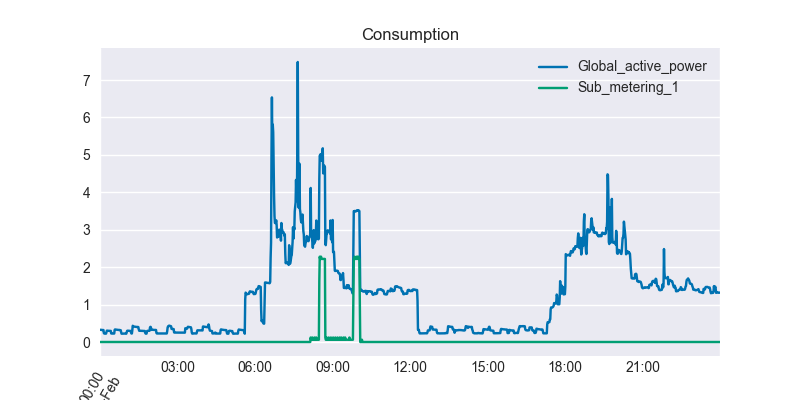

In [34]:
# check one single day day:
day_target = '02/01/2007'
df[day_target:day_target].plot(figsize=(8, 4))
plt.xticks(rotation=60)
plt.title("Consumption")
plt.legend()
plt.show()

In [35]:
ts = df.resample("D").mean()

day_ini = '01/01/2007'
day_end = '04/30/2007'
small_ts = ts[day_ini:day_end]
print(small_ts)
np.sum(pd.Series(small_ts['Global_active_power']).values)

            Global_active_power  Sub_metering_1
2007-01-01             1.909031        0.000000
2007-01-02             0.881414        0.000000
2007-01-03             0.704204        0.000000
2007-01-04             2.263481        0.043792
2007-01-05             1.884281        0.061792
2007-01-06             1.047485        0.055667
2007-01-07             1.699736        0.082792
2007-01-08             1.556500        0.000000
2007-01-09             1.297954        0.070333
2007-01-10             1.496389        0.032125
2007-01-11             1.566107        0.057417
2007-01-12             1.014789        0.000000
2007-01-13             2.213065        0.325250
2007-01-14             2.090213        0.074093
2007-01-15             1.492137        0.045792
2007-01-16             1.171114        0.085958
2007-01-17             1.977561        0.145833
2007-01-18             1.264904        0.000000
2007-01-19             1.028083        0.087625
2007-01-20             2.176203        0

nan

<IPython.core.display.Javascript object>


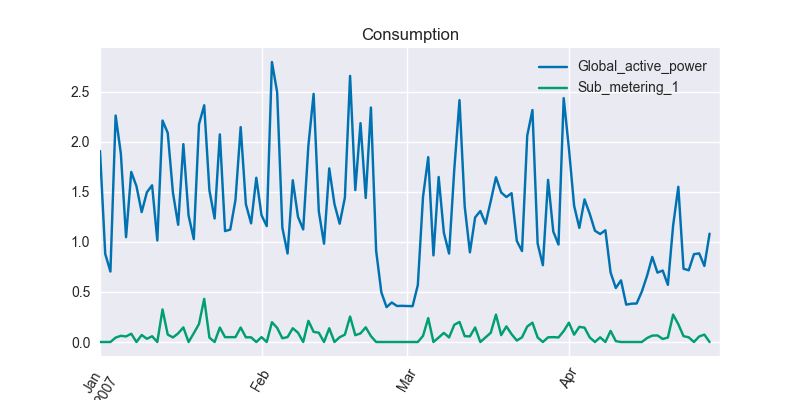

In [38]:
# grouping by day:
small_ts.plot(figsize=(8, 4))
plt.xticks(rotation=60)
plt.title("Consumption")
plt.legend()
plt.show()

Les dates avec des creux semblent coïncider avec les vacances scolaires 2007, cf. http://cache.media.education.gouv.fr/file/83/6/5836.pdf

## Question 15: 
Charger les données avec ```pandas```, et ne garder que les colonnes ```DATE``` et ```TG```.
Diviser par 10 la colonne TG pour obtenir des températures en degrés Celsius.
Traiter les éléments de température aberrants comme des ```NaN```.

In [39]:
colnames = ['    DATE', '   TG']
my_loc = 'TG_STAID011249.txt' #change according to your settings 
temp_df = pd.read_csv(my_loc, sep=',', comment='#',
                      usecols=colnames, na_values="-9999")
# note that NAN are coding with values -9999
temp_df.columns = ['Date', 'Temperature']

# need to get the correct temperature unit
temp_df['Temperature'] = temp_df['Temperature'] / 10.

temp_df.head()

,Date,Temperature
0,19210301,5.0
1,19210302,4.6
2,19210303,4.6
3,19210304,3.1
4,19210305,9.5


# Question 16:
Créer un DataFrame **pandas** des températures journalières entre le 1er janvier et le 30 avril 2007. Afficher sur un même graphique ces températures et la séries *Global_active_power*.

In [40]:
# need to correct the days format
temp_df['Date'] = pd.to_datetime(temp_df['Date'], format='%Y%m%d')
temp_ts = temp_df.set_index(['Date'])
small_temp_ts = temp_ts[day_ini:day_end]
temp_df.head()

,Date,Temperature
0,1921-03-01,5.0
1,1921-03-02,4.6
2,1921-03-03,4.6
3,1921-03-04,3.1
4,1921-03-05,9.5


<IPython.core.display.Javascript object>


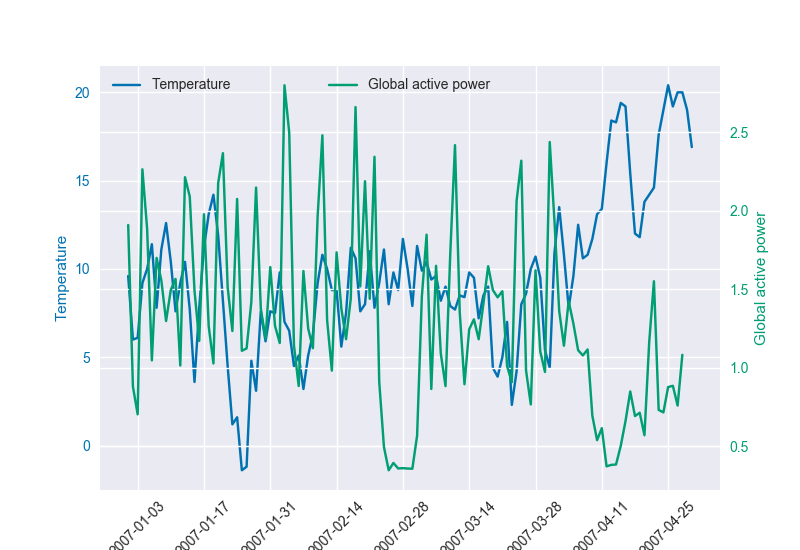

In [41]:
fig, ax1 = plt.subplots()
ax1.plot(small_temp_ts, '-', color=color_blind_list[0], label='Temperature')
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Temperature', color=color_blind_list[0])
for tl in ax1.get_yticklabels():
    tl.set_color(color_blind_list[0])
plt.legend(loc='upper left')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(small_ts["Global_active_power"], '-',
         color=color_blind_list[1], label='Global active power')
ax2.set_ylabel('Global active power', color=color_blind_list[1])
for tl in ax2.get_yticklabels():
    tl.set_color(color_blind_list[1])
plt.legend(loc='upper center')
plt.show()